In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble._hist_gradient_boosting.gradient_boosting import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.model_selection import  GridSearchCV

In [2]:
df = pd.read_csv('MICRODADOS_ENEM_2020.csv', nrows=2_900_000 , encoding='latin-1', sep=';')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501402,Belém,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2408102,Natal,24,RN,1,1,1,1,702.00,689.00,693.00,698.00,604.10,661.70,595.30,711.30,BCBDBDCCCDBDDBADEEACEEAECBECCDBCACDEBEECEBAAE,BCAECABCDCEBDBBBDAABABACBCDDDBDDBABDAADACACBC,99999CADDEDADBAABEAADAAAADCADAABDCCBEECAEECAAC...,EBEBDEDAECBADCADDABACAEDBEEEAEADCCBCEACDACEBB,1,ABBACBCCCDDDDBAEEBECEDACABDCBEDAECDABECCBBADE,BCEECDBCCDEBDBBBBEAAAEACBCDDDBDDBABDABDDBAABC,99999CBDDEDBDBACECABAAAEAECCDCABCBBBBEEDCECAAE...,BBEADECAECBBXCEBADBACAEDACEDADAADCBCCBBDABBEE,1.00,120.00,120.00,120.00,120.00,100.00,580.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,1.00,0,2927408.00,Salvador,29.00,BA,2.00,1.00,1.00,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.00,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,1.00,0,3547304.00,Santana de Parnaíba,35.00,SP,3.00,1.00,1.00,3547304,Santana de Parnaíba,35,SP,1,1,1,1,700.00,688.00,692.00,696.00,620.80,675.00,624.20,759.40,EBEDCCCDCBDBAECAECCECEACCBAABBBCEABCAAAEBEBAE,DABCCACCBCCDCADBDCBAAEBDDBAABDBAEBEBBABDABDBE,DCEAB99999AADAECCEBCDDDCBABDDABBCEEBAEDDDADEBE...,CBDBDCCDDEECBAABBBADEDEDBECDEBBADAEBAABBECBBA,0,BDECCACBEBDEAEDAECCBAEABCCEADDBBCADCBDDEBDBAC,DABCCAECBABECADBDCCABDBCDDAABDBAEBEBBDBDDBDBE,DCEAD99999AADACCCCBBDDCABAECAABBEECBAEDDBBEEBE...,EBDBXCCDAEECBAABABAEDDEDAECBCDCADEEBBABBACBCA,1.00,140.00,200.00,140.00,120.00,160.00,760.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3121605,Diamantina,31,MG,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.00,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B


In [4]:
df.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [5]:
df = df.drop(columns=['CO_MUNICIPIO_ESC','NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'CO_PROVA_CN','CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT','TP_SIT_FUNC_ESC','TP_LINGUA','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT','CO_MUNICIPIO_PROVA','NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA','IN_TREINEIRO','TP_NACIONALIDADE','NU_INSCRICAO', 'NU_ANO', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 
                   'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 
                   'TX_GABARITO_MT',
                      'TP_DEPENDENCIA_ADM_ESC','TP_STATUS_REDACAO','NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5','Q007','Q009','Q010','Q011','Q013', 'Q014',
                    'Q015', 'Q016', 'Q017','Q018', 'Q019','Q020','Q021','Q023','SG_UF_ESC'])

In [6]:
df.columns.values

array(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'TP_LOCALIZACAO_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q008', 'Q012', 'Q022', 'Q024', 'Q025'],
      dtype=object)

In [7]:
df.groupby(['TP_COR_RACA']).size()

TP_COR_RACA
0      56126
1     990254
2     384863
3    1384970
4      65620
5      18167
dtype: int64

In [8]:
df.isnull().sum()

TP_FAIXA_ETARIA             0
TP_SEXO                     0
TP_ESTADO_CIVIL             0
TP_COR_RACA                 0
TP_ST_CONCLUSAO             0
TP_ANO_CONCLUIU             0
TP_ESCOLA                   0
TP_ENSINO             2082438
TP_LOCALIZACAO_ESC    2359613
NU_NOTA_CN            1378541
NU_NOTA_CH            1297536
NU_NOTA_LC            1297536
NU_NOTA_MT            1378541
NU_NOTA_REDACAO       1297536
Q001                    93082
Q002                    93082
Q003                    93082
Q004                    93082
Q005                    93082
Q006                    93082
Q008                    93082
Q012                    93082
Q022                    93082
Q024                    93082
Q025                    93082
dtype: int64

In [9]:
df.describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005
count,2900000.00,2900000.00,2900000.00,2900000.00,2900000.00,2900000.00,817562.00,540387.00,1521459.00,1602464.00,1602464.00,1521459.00,1602464.00,2806918.00
mean,5.85,1.07,2.16,1.48,2.77,1.34,1.01,1.03,491.98,514.12,525.60,522.14,592.06,3.76
std,3.95,0.44,1.01,0.67,4.17,0.56,0.08,0.18,81.42,96.79,74.44,119.23,202.29,1.45
min,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,3.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,427.30,438.00,479.70,426.00,480.00,3.00
50%,4.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,484.50,515.10,531.40,505.20,580.00,4.00
75%,9.00,1.00,3.00,2.00,4.00,2.00,1.00,1.00,551.00,583.80,578.00,604.00,720.00,4.00
max,20.00,4.00,5.00,4.00,14.00,3.00,2.00,2.00,854.80,862.60,790.30,975.00,1000.00,20.00


In [10]:
variaveis_numericas = []
for i in df.columns[0:16].tolist():
        if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':            
            print(i, ':' , df.dtypes[i]) 
            variaveis_numericas.append(i)

TP_FAIXA_ETARIA : int64
TP_ESTADO_CIVIL : int64
TP_COR_RACA : int64
TP_ST_CONCLUSAO : int64
TP_ANO_CONCLUIU : int64
TP_ESCOLA : int64
TP_ENSINO : float64
TP_LOCALIZACAO_ESC : float64
NU_NOTA_CN : float64
NU_NOTA_CH : float64
NU_NOTA_LC : float64
NU_NOTA_MT : float64
NU_NOTA_REDACAO : float64


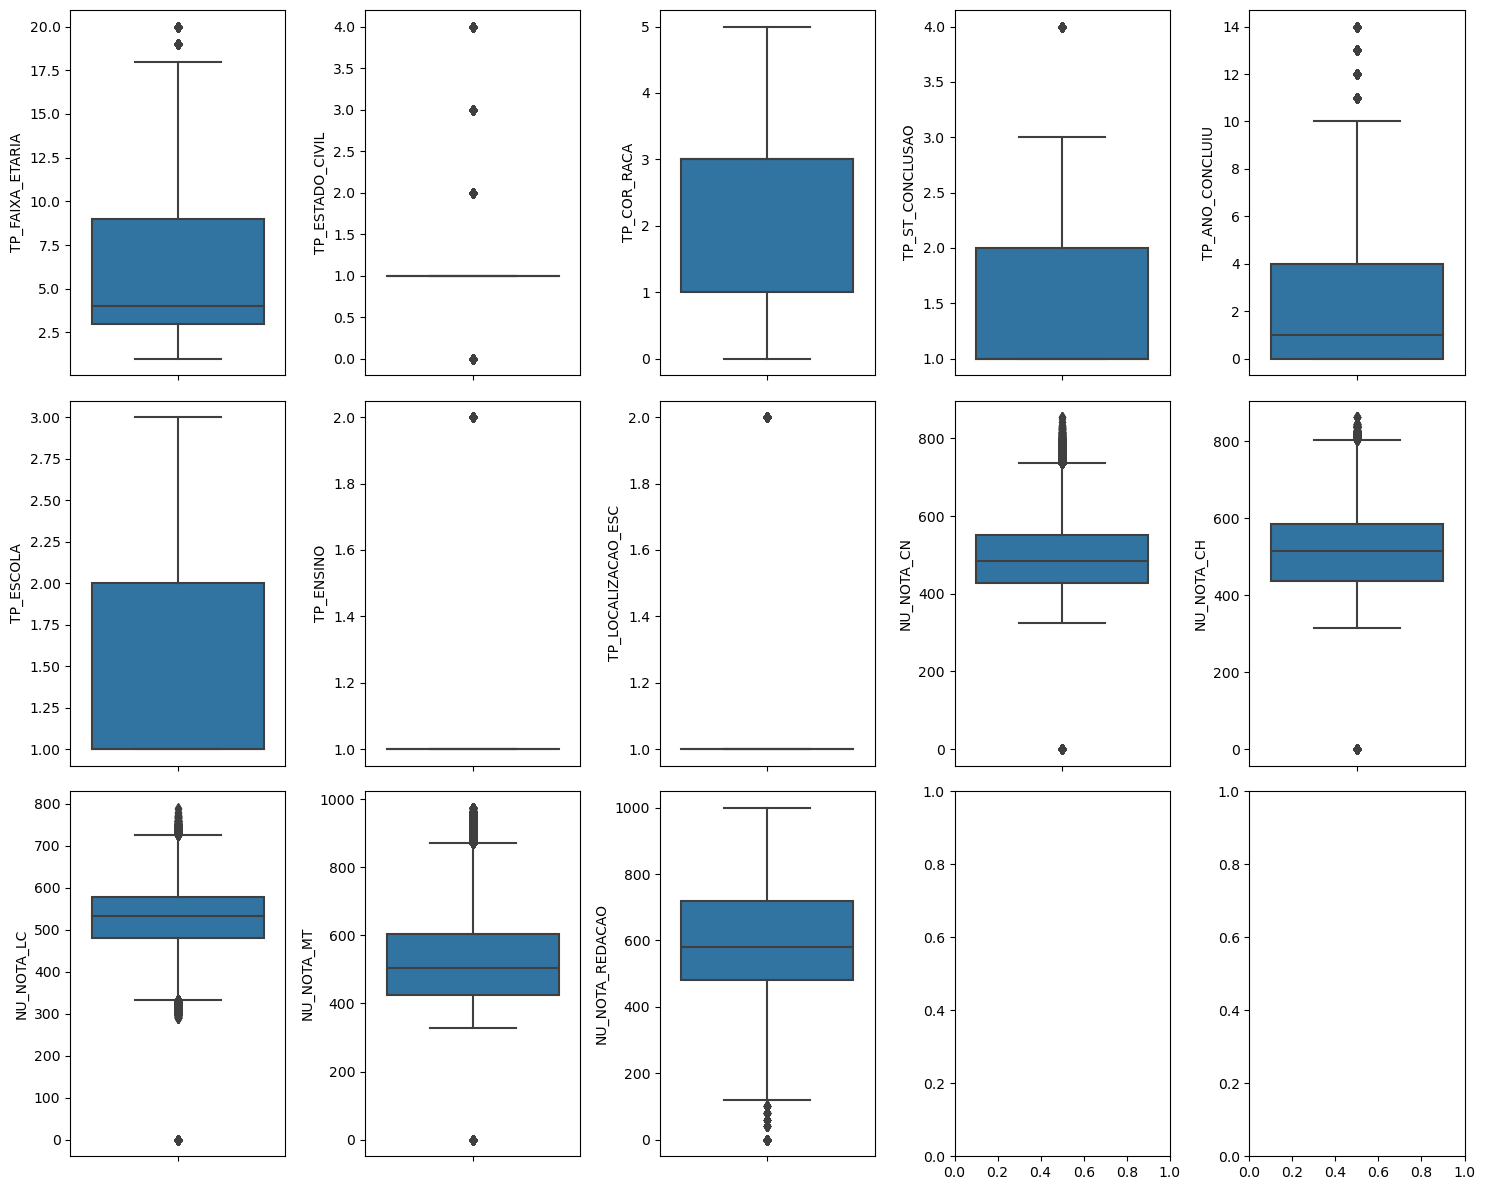

In [11]:
# Com este comando iremos exibir todos gráficos de todas colunas de uma vez só para facilitar nossa analise.

# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(3, 5) #2 linhas e 5 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 5:
        linha += 1
        coluna = 0            

plt.show()

# Tratamento de dados

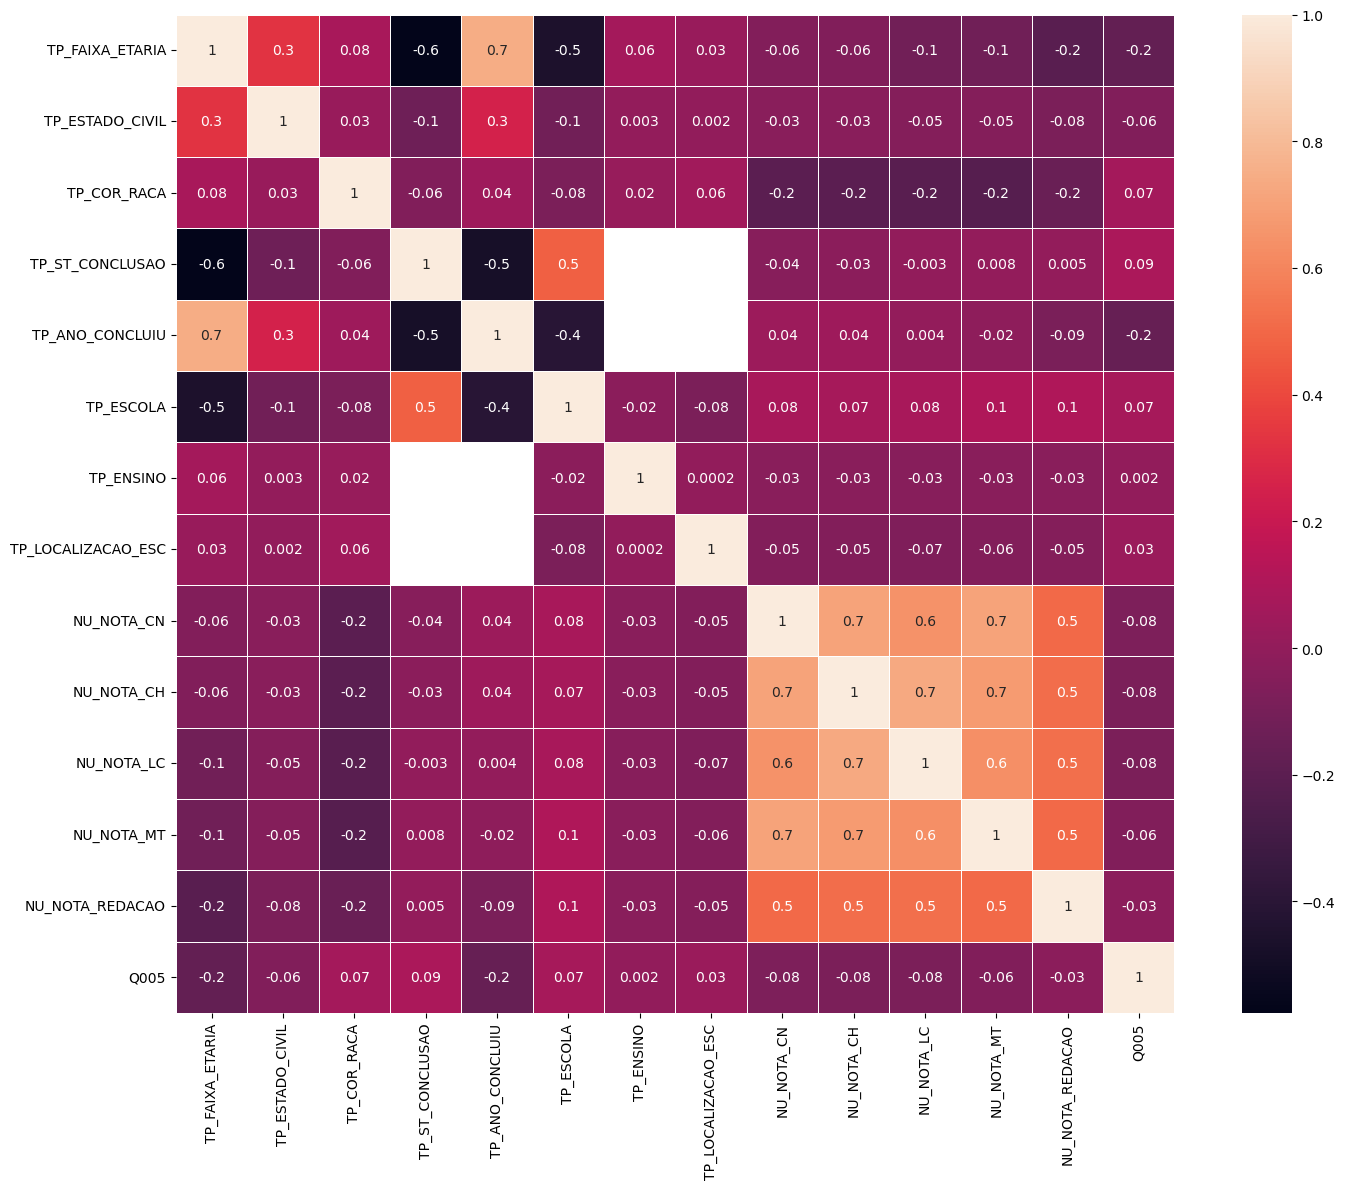

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

sns.heatmap(df.corr(), annot=True, fmt='.1g', square=True, linewidths=0.5)
plt.show()



In [13]:
# dados_nordeste = df[df['SG_UF_ESC'].isin(['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'])]


In [14]:
# dados_nordeste.fillna(0, inplace=True)
# dados_nordeste.fillna(dados_nordeste.mean(), inplace=True)
# dados_nordeste.dropna(inplace=True)
df.dropna(inplace=True)




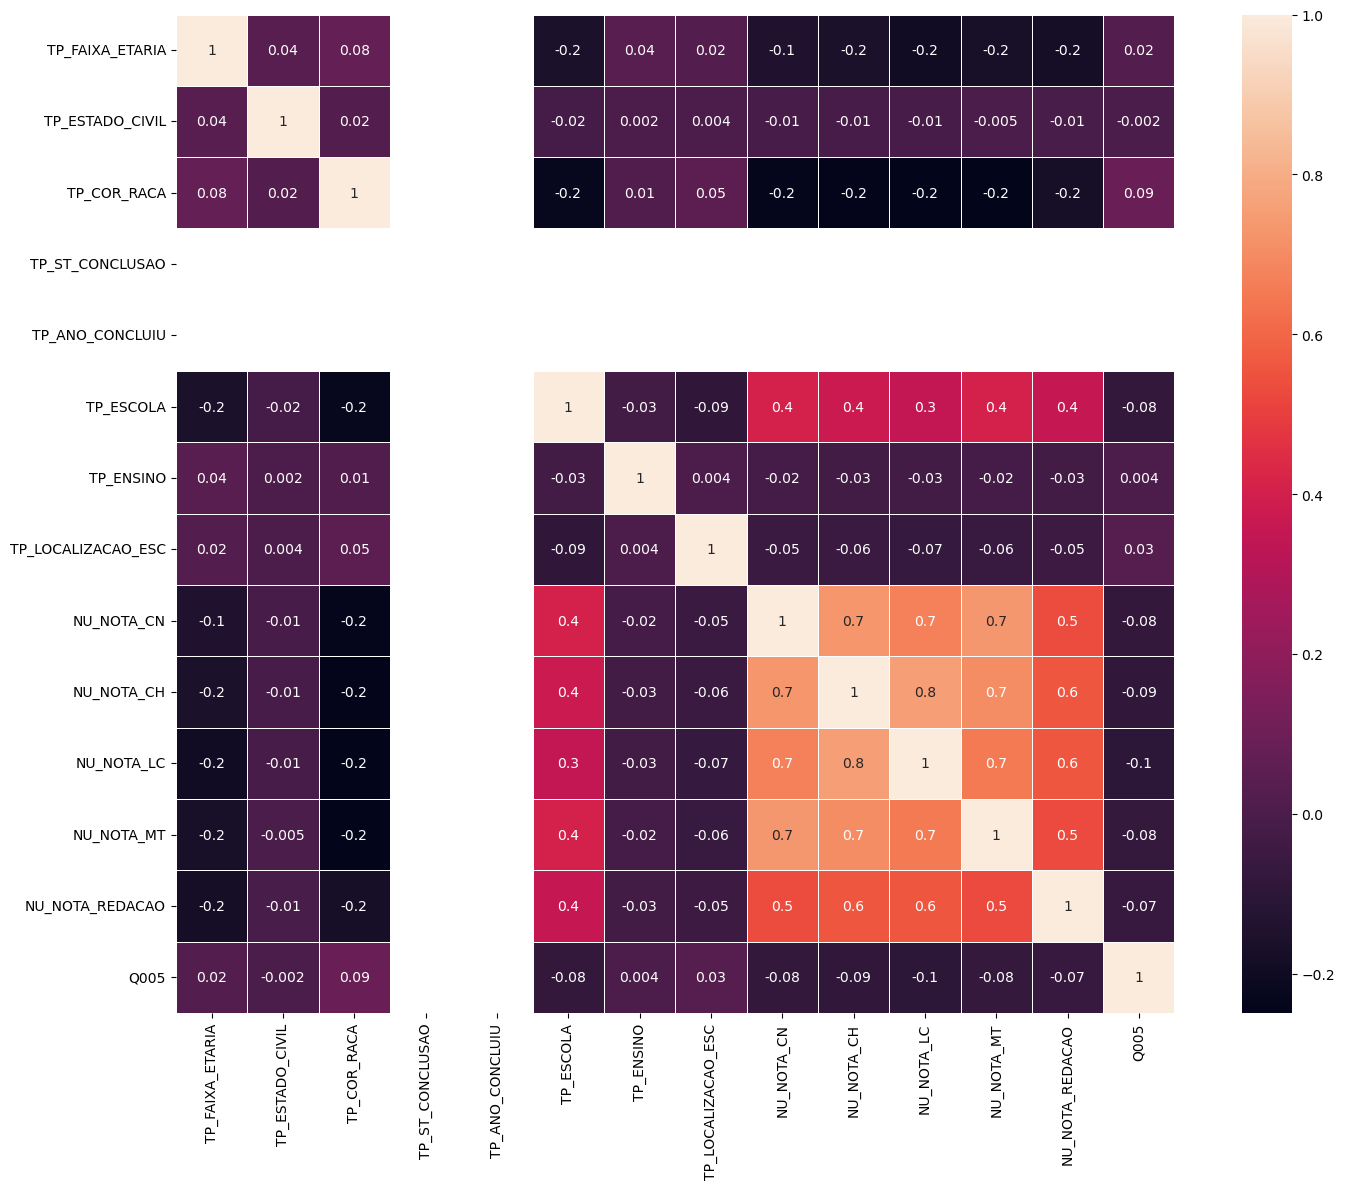

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

sns.heatmap(df.corr(), annot=True, fmt='.1g', square=True, linewidths=0.5)
plt.show()


In [16]:
def replace_categorical_with_numeric(df):
    for col in df.columns:
        if df[col].dtype == object:
            df[col] = pd.factorize(df[col])[0] + 1
    return df

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354782 entries, 36 to 2899983
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TP_FAIXA_ETARIA     354782 non-null  int64  
 1   TP_SEXO             354782 non-null  object 
 2   TP_ESTADO_CIVIL     354782 non-null  int64  
 3   TP_COR_RACA         354782 non-null  int64  
 4   TP_ST_CONCLUSAO     354782 non-null  int64  
 5   TP_ANO_CONCLUIU     354782 non-null  int64  
 6   TP_ESCOLA           354782 non-null  int64  
 7   TP_ENSINO           354782 non-null  float64
 8   TP_LOCALIZACAO_ESC  354782 non-null  float64
 9   NU_NOTA_CN          354782 non-null  float64
 10  NU_NOTA_CH          354782 non-null  float64
 11  NU_NOTA_LC          354782 non-null  float64
 12  NU_NOTA_MT          354782 non-null  float64
 13  NU_NOTA_REDACAO     354782 non-null  float64
 14  Q001                354782 non-null  object 
 15  Q002                354782 non-n

In [18]:
df = replace_categorical_with_numeric(df)

df

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q008,Q012,Q022,Q024,Q025
36,3,1,1,3,2,0,2,1.00,1.00,486.90,509.70,532.30,433.90,620.00,1,1,1,1,4.00,1,1,1,1,1,1
65,3,1,1,3,2,0,2,1.00,1.00,516.80,565.70,567.70,384.20,880.00,2,2,1,1,3.00,1,1,1,2,1,1
84,2,1,1,3,2,0,2,1.00,1.00,467.50,518.80,541.00,404.60,600.00,3,1,2,2,6.00,1,2,1,3,1,1
89,2,1,1,1,2,0,2,1.00,1.00,578.40,681.10,638.20,669.80,820.00,4,2,2,1,3.00,2,1,1,2,2,2
93,4,2,1,2,2,0,2,1.00,1.00,606.30,659.80,607.10,743.00,920.00,1,1,2,3,4.00,3,1,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899947,3,1,1,1,2,0,2,1.00,1.00,478.50,599.80,624.90,606.40,860.00,1,5,2,4,2.00,3,1,1,2,3,2
2899951,3,2,1,1,2,0,2,1.00,1.00,427.10,458.50,472.40,490.70,540.00,6,1,1,2,3.00,5,1,1,2,1,2
2899964,3,2,1,1,2,0,3,1.00,1.00,425.20,553.60,486.50,586.60,480.00,8,7,6,4,3.00,16,2,2,1,3,2
2899965,3,1,1,3,2,0,2,1.00,1.00,427.90,380.70,515.90,385.30,340.00,6,1,2,2,3.00,2,1,1,1,1,2


In [19]:
df = df.astype(int)


In [20]:
# vartarget = dados_nordeste[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]
# vartarget = dados_nordeste[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].values.reshape(-1)
vartarget = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]




In [21]:
# varpred = dados_nordeste.drop(columns=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])
varpred = df.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'], axis=1)

In [22]:
# TREINO E TESTE DOS DADOS, DIVIDINDO A BASE EM 70% PARA TREINO E 30% PARA TESTE
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(varpred, vartarget, test_size=0.3, random_state=10)

In [23]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import RandomForestRegressor

# # Treinando o modelo
# modelo = RandomForestRegressor()
# modelo.fit(x_train, y_train)

# # Avaliando o modelo
# y_pred = modelo.predict(x_test)


In [24]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# # R²
# r2 = r2_score(y_test, y_pred)
# print('R²:', r2)
# print('MAE: ', mae)
# print('MSE: ', mse)


In [25]:
from sklearn.linear_model import LinearRegression

# Treinando o modelo
modelo1 = LinearRegression()
modelo1.fit(x_train, y_train)

# Avaliando o modelo
y_pred = modelo1.predict(x_test)

# Calculando as métricas de avaliação
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('R²:', r2)



MAE: 77.96856962270769
MSE: 11384.305076721856
R²: 0.2795027752611237


In [26]:
# from sklearn.tree import DecisionTreeRegressor

# # Treinando o modelo
# modelo = DecisionTreeRegressor(random_state=42)
# modelo.fit(x_train, y_train)

# # Avaliando o modelo
# y_pred = modelo.predict(x_test)

# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("MAE: ", mae)
# print("MSE: ", mse)
# print("R²: ", r2)


In [27]:
!pip install xgboost


In [28]:
# from xgboost import XGBRegressor

# # Treinando o modelo
# modelo = XGBRegressor()
# modelo.fit(x_train, y_train)

# # Avaliando o modelo
# y_pred = modelo.predict(x_test)

# # Calculando as métricas de avaliação
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print('MAE: ', mae)
# print('MSE: ', mse)
# print('R²: ', r2)


In [29]:
# from sklearn.linear_model import Ridge

# # Criando o modelo
# modelo = Ridge(alpha=1.0)

# # Treinando o modelo
# modelo.fit(x_train, y_train)

# # Avaliando o modelo
# y_pred = modelo.predict(x_test)

# # Métricas de avaliação
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print('MAE: ', mae)
# print('MSE: ', mse)
# print('R²: ', r2)


In [30]:
# from sklearn.neighbors import KNeighborsRegressor

# # Treinando o modelo
# modelo = KNeighborsRegressor()
# modelo.fit(x_train, y_train)

# # Avaliando o modelo
# y_pred = modelo.predict(x_test)

# # Métricas de avaliação
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print('MAE:', mae)
# print('MSE:', mse)
# print('R²:', r2)


In [31]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(x_train)
X_teste_normalizados = sc.transform(x_test)

In [32]:
# TP_FAIXA_ETARIA = 1
# TP_SEXO = 1
# TP_ESTADO_CIVIL = 1
# TP_COR_RACA = 1
# TP_ST_CONCLUSAO = 2
# TP_ANO_CONCLUIU = 2
# TP_ESCOLA = 3
# TP_ENSINO = 1
# SG_UF_ESC = 43
# TP_DEPENDENCIA_ADM_ESC = 4
# TP_LOCALIZACAO_ESC = 1
# TP_STATUS_REDACAO = 1
# NU_NOTA_COMP1 = 200
# NU_NOTA_COMP2 = 200
# NU_NOTA_COMP3 = 200
# NU_NOTA_COMP4 = 200
# NU_NOTA_COMP5 = 200
# Q001 = 3
# Q002 = 2
# Q003 = 1
# Q004 = 1
# Q005 = 4
# Q006 = 4
# Q007 = 1
# Q008 = 1
# Q009 = 3
# Q010 = 1
# Q011 = 1
# Q012 = 1
# Q013 = 1
# Q014 = 1
# Q015 = 1
# Q016 = 1
# Q017 = 1
# Q018 = 1
# Q019 = 1
# Q020 = 1
# Q021 = 1
# Q022 = 1
# Q023 = 1
# Q024 = 1
# Q025 = 1

# novos_dados = [TP_FAIXA_ETARIA, TP_SEXO, TP_ESTADO_CIVIL, TP_COR_RACA, TP_ST_CONCLUSAO, TP_ANO_CONCLUIU, TP_ESCOLA, TP_ENSINO, SG_UF_ESC, TP_DEPENDENCIA_ADM_ESC,
#                TP_LOCALIZACAO_ESC, TP_STATUS_REDACAO, NU_NOTA_COMP1, NU_NOTA_COMP2, NU_NOTA_COMP3, NU_NOTA_COMP4, NU_NOTA_COMP5, Q001, Q002, Q003, Q004, Q005, Q006, 
#                Q007, Q008, Q009, Q010, Q011, Q012, Q013, Q014, Q015, Q016, Q017, Q018, Q019, Q020, Q021, Q022, Q023, Q024, Q025]
TP_FAIXA_ETARIA = 2
TP_SEXO = 1
TP_ESTADO_CIVIL = 1
TP_COR_RACA = 1
TP_ST_CONCLUSAO = 2
TP_ANO_CONCLUIU = 2
TP_ESCOLA = 3
TP_ENSINO = 1

TP_LOCALIZACAO_ESC = 1
Q001 = 1
Q002 = 3
Q003 = 1
Q004 = 1
Q005 = 4
Q006 = 4
Q008 = 1
Q012 = 1
Q022 = 1
Q024 = 2
Q025 = 1


novos_dados = [TP_FAIXA_ETARIA, TP_SEXO, TP_ESTADO_CIVIL, TP_COR_RACA, TP_ST_CONCLUSAO, TP_ANO_CONCLUIU,TP_ESCOLA, TP_ENSINO, TP_LOCALIZACAO_ESC, Q001, Q002, Q003, Q004, Q005, Q006, Q008, Q012, Q022, Q024, Q025]

In [33]:
import numpy as np
# Reshape
X = np.array(novos_dados).reshape(1, -1)
X = sc.transform(X)

notas = modelo1.predict(X)[0]
print("A nota do aluno em Matemática é:", notas[0])
print("A nota do aluno em Linguagens e Códigos é:", notas[1])
print("A nota do aluno em Ciências Humanas é:", notas[2])
print("A nota do aluno em Ciências da Natureza é:", notas[3])
print("A nota do aluno na Redação é:", notas[4])

A nota do aluno em Matemática é: 408.66457672804586
A nota do aluno em Linguagens e Códigos é: 454.84886931875167
A nota do aluno em Ciências Humanas é: 509.16528174678604
A nota do aluno em Ciências da Natureza é: 400.452859584592
A nota do aluno na Redação é: 587.3933301789132


C:\Users\kaios\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\kaios\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import joblib

# salvar modelo
joblib.dump(modelo1, 'modelo1.joblib', compress=True)

# carregar modelo
modelo1_salvo = joblib.load('modelo1.joblib')


In [35]:
print(modelo1_salvo)

LinearRegression()
